# Mushroom dataset — structure and categorical mappings

This notebook loads the UCI Mushroom dataset (`agaricus-lepiota.data`), renames columns to readable feature names, maps single-letter categorical codes to descriptive strings (based on the dataset documentation), converts columns to pandas 'category' dtype, and saves a cleaned CSV for downstream analysis. All features are categorical.

In [29]:
import pandas as pd
import numpy as np
from pathlib import Path

DATA_PATH = Path('agaricus-lepiota.data')
OUT_CSV = Path('mushroom_structured.csv')

# Column names in the dataset (in order) - use snake_case directly so downstream code refers to consistent names
colnames = [
    'poisonous', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
    'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape',
    'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
    'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color',
    'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat',
 ]

# Load dataset, treating '?' as NaN
df = pd.read_csv(DATA_PATH, header=None, names=colnames, na_values='?')

# Quick sanity
print('Loaded', len(df), 'rows and', len(df.columns), 'columns')
df.head(2)

Loaded 8124 rows and 23 columns


,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


## Rename columns to snake_case and create a human-readable label for the target

In [30]:
# Rename to snake_case for convenience (keep original 'poisonous' name but also create 'label')
rename_map = {
    'cap-shape': 'cap_shape',
    'cap-surface': 'cap_surface',
    'cap-color': 'cap_color',
    'gill-attachment': 'gill_attachment',
    'gill-spacing': 'gill_spacing',
    'gill-size': 'gill_size',
    'gill-color': 'gill_color',
    'stalk-shape': 'stalk_shape',
    'stalk-root': 'stalk_root',
    'stalk-surface-above-ring': 'stalk_surface_above_ring',
    'stalk-surface-below-ring': 'stalk_surface_below_ring',
    'stalk-color-above-ring': 'stalk_color_above_ring',
    'stalk-color-below-ring': 'stalk_color_below_ring',
    'veil-type': 'veil_type',
    'veil-color': 'veil_color',
    'ring-number': 'ring_number',
    'ring-type': 'ring_type',
    'spore-print-color': 'spore_print_color'
}
df = df.rename(columns=rename_map)

# Create readable label from 'poisonous' where p=poisonous, e=edible
df['label'] = df['poisonous'].map({'p': 'poisonous', 'e': 'edible'})

df.head(2)

,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,label
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,poisonous
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,edible


## Mappings from single-letter codes to human-readable categories

Below are dictionaries for each attribute based on the dataset documentation. We'll keep the original coded columns and produce new columns with the suffix `_readable`.

In [31]:
mappings = {}

# Target already mapped to df['label'] but include map for completeness
mappings['poisonous'] = {'p': 'poisonous', 'e': 'edible'}

# cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
mappings['cap_shape'] = {'b':'bell','c':'conical','x':'convex','f':'flat','k':'knobbed','s':'sunken'}
# cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
mappings['cap_surface'] = {'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'}
# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
mappings['cap_color'] = {'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'}
# bruises: bruises=t,no=f
mappings['bruises'] = {'t':'bruises','f':'no'}
# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
mappings['odor'] = {'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'}
# gill-attachment: attached=a,descending=d,free=f,notched=n
mappings['gill_attachment'] = {'a':'attached','d':'descending','f':'free','n':'notched'}
# gill-spacing: close=c,crowded=w,distant=d
mappings['gill_spacing'] = {'c':'close','w':'crowded','d':'distant'}
# gill-size: broad=b,narrow=n
mappings['gill_size'] = {'b':'broad','n':'narrow'}
# gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
mappings['gill_color'] = {'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'}
# stalk-shape: enlarging=e,tapering=t
mappings['stalk_shape'] = {'e':'enlarging','t':'tapering'}
# stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=? -> NaN
mappings['stalk_root'] = {'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted'}
# stalk-surface-above-ring/below-ring: fibrous=f,scaly=y,silky=k,smooth=s
mappings['stalk_surface_above_ring'] = {'f':'fibrous','y':'scaly','k':'silky','s':'smooth'}
mappings['stalk_surface_below_ring'] = mappings['stalk_surface_above_ring']
# stalk-color-above-ring / below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
mappings['stalk_color_above_ring'] = {'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'}
mappings['stalk_color_below_ring'] = mappings['stalk_color_above_ring']
# veil-type: partial=p,universal=u
mappings['veil_type'] = {'p':'partial','u':'universal'}
# veil-color: brown=n,orange=o,white=w,yellow=y
mappings['veil_color'] = {'n':'brown','o':'orange','w':'white','y':'yellow'}
# ring-number: none=n,one=o,two=t
mappings['ring_number'] = {'n':'none','o':'one','t':'two'}
# ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
mappings['ring_type'] = {'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheathing','z':'zone'}
# spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
mappings['spore_print_color'] = {'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green','o':'orange','u':'purple','w':'white','y':'yellow'}
# population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
mappings['population'] = {'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'}
# habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
mappings['habitat'] = {'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'}

# Check mapping keys count
len(mappings)

23

In [32]:
# Apply mappings to create new readable columns alongside raw columns
for raw_col, mapping in mappings.items():
    # Determine actual column name in df for some keys (poisonous uses original name)
    col = raw_col
    if col not in df.columns:
        # try with hyphen->underscore rename_map earlier was applied
        col = col
    readable_col = f'{col}_readable'
    # Map values; preserve NaN for missing entries (e.g., stalk_root)
    df[readable_col] = df[col].map(mapping)

# For stalk_root keep NaN where original was NaN (mapped will be NaN already)
df[['stalk_root','stalk_root_readable']].head(5)

,stalk_root,stalk_root_readable
0,e,equal
1,c,club
2,c,club
3,e,equal
4,e,equal


In [33]:
# Convert all readable columns to 'category' dtype
for c in df.columns:
    if c.endswith('_readable'):
        df[c] = df[c].astype('category')

# Also convert original coded feature columns to 'category' (they are categorical too)
for c in colnames:
    if c in df.columns:
        df[c] = df[c].astype('category')

# Show info and a sample of the mapped columns
df.info()

display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   poisonous                          8124 non-null   category
 1   cap_shape                          8124 non-null   category
 2   cap_surface                        8124 non-null   category
 3   cap_color                          8124 non-null   category
 4   bruises                            8124 non-null   category
 5   odor                               8124 non-null   category
 6   gill_attachment                    8124 non-null   category
 7   gill_spacing                       8124 non-null   category
 8   gill_size                          8124 non-null   category
 9   gill_color                         8124 non-null   category
 10  stalk_shape                        8124 non-null   category
 11  stalk_root                         5644 non

,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring_readable,stalk_color_above_ring_readable,stalk_color_below_ring_readable,veil_type_readable,veil_color_readable,ring_number_readable,ring_type_readable,spore_print_color_readable,population_readable,habitat_readable
0,p,x,s,n,t,p,f,c,n,k,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,x,s,y,t,a,f,c,b,k,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,e,b,s,w,t,l,f,c,b,n,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,p,x,y,w,t,p,f,c,n,n,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,e,x,s,g,f,n,f,w,b,k,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
5,e,x,y,y,t,a,f,c,b,n,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
6,e,b,s,w,t,a,f,c,b,g,...,smooth,white,white,partial,white,one,pendant,black,numerous,meadows
7,e,b,y,w,t,l,f,c,b,n,...,smooth,white,white,partial,white,one,pendant,brown,scattered,meadows
8,p,x,y,w,t,p,f,c,n,p,...,smooth,white,white,partial,white,one,pendant,black,several,grasses
9,e,b,s,y,t,a,f,c,b,g,...,smooth,white,white,partial,white,one,pendant,black,scattered,meadows


In [34]:
# Value counts for target and a couple important features
print('Target distribution:')
print(df['label'].value_counts())
print()
print('Odor distribution (readable):')
print(df['odor_readable'].value_counts())
print()
print('Gill color distribution (readable):')
print(df['gill_color_readable'].value_counts())

Target distribution:
label
edible       4208
poisonous    3916
Name: count, dtype: int64

Odor distribution (readable):
odor_readable
none        3528
foul        2160
spicy        576
fishy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: count, dtype: int64

Gill color distribution (readable):
gill_color_readable
buff         1728
pink         1492
white        1202
brown        1048
gray          752
chocolate     732
purple        492
black         408
red            96
yellow         86
orange         64
green          24
Name: count, dtype: int64


In [35]:
# Save the mapped dataframe to CSV for downstream use
df.to_csv(OUT_CSV, index=False)
print('Saved mapped CSV to', OUT_CSV)

Saved mapped CSV to mushroom_structured.csv


## Notes and next steps

- All features are categorical and have been mapped to human-readable strings.
- Missing values in `stalk_root` are preserved as NaN.
- Next: exploratory plots (countplots, stacked bars), encoding for ML (one-hot, target encoding), and a modeling pipeline (train/test split, cross-validation, tree-based models).

In [36]:
df = pd.read_csv("mushroom_structured.csv")
df

,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring_readable,stalk_color_above_ring_readable,stalk_color_below_ring_readable,veil_type_readable,veil_color_readable,ring_number_readable,ring_type_readable,spore_print_color_readable,population_readable,habitat_readable
0,p,x,s,n,t,p,f,c,n,k,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,x,s,y,t,a,f,c,b,k,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,e,b,s,w,t,l,f,c,b,n,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,p,x,y,w,t,p,f,c,n,n,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,e,x,s,g,f,n,f,w,b,k,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,e,x,s,n,f,n,a,c,b,y,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,e,f,s,n,f,n,a,c,b,n,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,p,k,y,n,f,y,f,c,n,b,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


## Exploratory Data Analysis (EDA)
This section generates quick visualizations to understand label balance, important categorical distributions, relationships between features and the target, and missing-value patterns.\n
The plots use seaborn/matplotlib; run the cell below to produce the figures.

C:\Users\iclyd\AppData\Local\Temp\ipykernel_22132\3669477122.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2', ax=ax1)
C:\Users\iclyd\AppData\Local\Temp\ipykernel_22132\3669477122.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')
C:\Users\iclyd\AppData\Local\Temp\ipykernel_22132\3669477122.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30, ha='right')


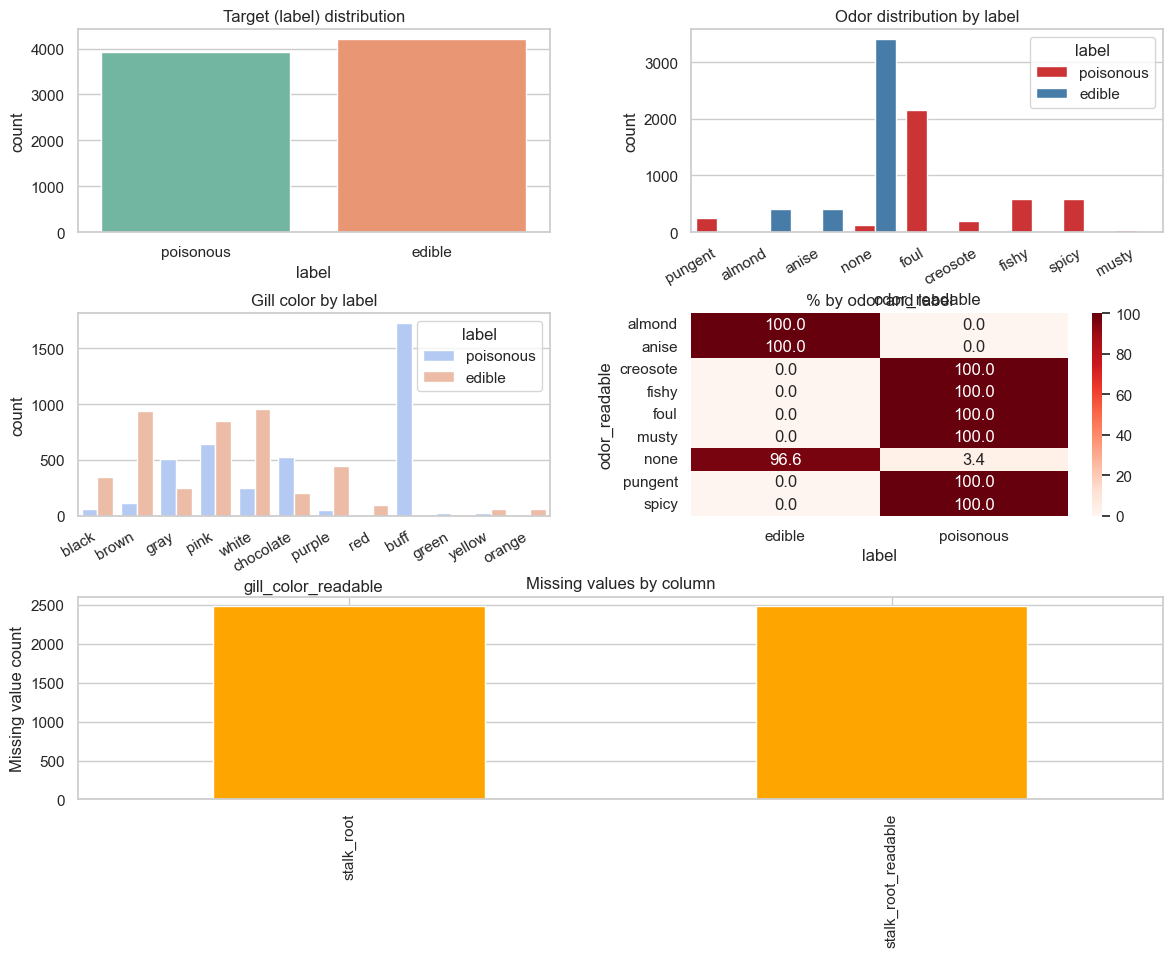


Top categorical cardinalities (number of categories):


C:\Users\iclyd\AppData\Local\Temp\ipykernel_22132\3669477122.py:59: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[c]):


In [ ]:
# EDA plots: label balance, odor vs label, gill color vs label, label-by-odor heatmap, missing values
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Ensure readable names exist (the notebook earlier maps these)
for col in ['label','odor_readable','gill_color_readable','stalk_root_readable']:
    if col not in df.columns:
        raise RuntimeError(f'Missing expected column: {col}')

fig = plt.figure(figsize=(14,10))
gs = fig.add_gridspec(3,2, hspace=0.4, wspace=0.3)

# 1) Target distribution
ax1 = fig.add_subplot(gs[0,0])
sns.countplot(data=df, x='label', palette='Set2', ax=ax1)
ax1.set_title('Target (label) distribution')

# 2) Odor distribution colored by label (stacked via countplot with hue)

ax2 = fig.add_subplot(gs[0,1])
sns.countplot(data=df, x='odor_readable', hue='label', palette='Set1', ax=ax2)
ax2.set_title('Odor distribution by label')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')

# 3) Gill color distribution by label (top 12 shown)

ax3 = fig.add_subplot(gs[1,0])
sns.countplot(data=df, x='gill_color_readable', hue='label', ax=ax3, palette='coolwarm')
ax3.set_title('Gill color by label')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30, ha='right')

# 4) Heatmap of proportion of poisonous by odor

pivot = (pd.crosstab(df['odor_readable'], df['label'], normalize='index') * 100).round(1)
ax4 = fig.add_subplot(gs[1,1])
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='Reds', ax=ax4)
# ax4.set_title('% by odor and label')

# 5) Missing value counts

ax5 = fig.add_subplot(gs[2,:])
missing = df.isna().sum()
missing = missing[missing>0].sort_values(ascending=False)
if len(missing)==0:
    ax5.text(0.5,0.5,'No missing values detected', ha='center', va='center')
    ax5.axis('off')
else:
    missing.plot(kind='bar', ax=ax5, color='orange')
    ax5.set_ylabel('Missing value count')
    ax5.set_title('Missing values by column')

plt.show()

# Also print top categorical cardinalities for quick reference
print('\nTop categorical cardinalities (number of categories):')
for c in df.columns:
    if pd.api.types.is_categorical_dtype(df[c]):
        print(f"{c}: {df[c].cat.categories.size}")